In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import itertools

In [8]:
''' STEP 1: Reading the input file (graph) and creating a progressive ID for the nodes. 
            Storing the nodes mapping with the new ID. '''

original_to_new_id = {}
new_id_counter = 1

edges = []

# Read the file
with open('./input/graph.txt', 'r') as file:
    for line in file:
        node1, node2, community = line.split("\t")
        node1, node2, community = int(node1), int(node2), int(community)
        
        # Storing the nodes mapping in 'original_to_new_id' dict
        if node1 not in original_to_new_id:
            original_to_new_id[node1] = new_id_counter
            new_id_counter += 1
        if node2 not in original_to_new_id:
            original_to_new_id[node2] = new_id_counter
            new_id_counter += 1
        
        # Get new IDs
        new_node1 = original_to_new_id[node1]
        new_node2 = original_to_new_id[node2]
        
        # Add the edge to the list
        edges.append((new_node1, new_node2, community))


In [9]:
print(len(original_to_new_id))
print(original_to_new_id)

21
{1647: 1, 45695: 2, 45694: 3, 45693: 4, 45692: 5, 45691: 6, 45690: 7, 45689: 8, 45688: 9, 45687: 10, 1844: 11, 8701: 12, 7231: 13, 7192: 14, 4306: 15, 3903: 16, 3902: 17, 1892: 18, 28597: 19, 28596: 20, 28595: 21}


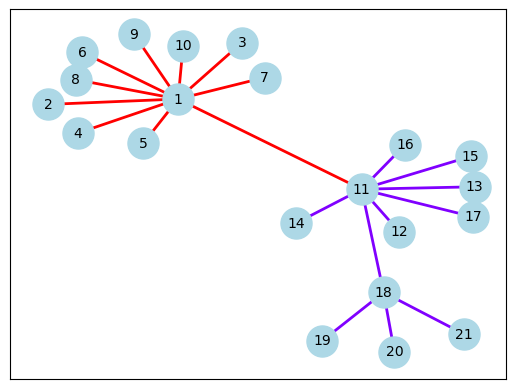

In [10]:
''' Step 2: Create the graph using NetworkX, with a different color for each community '''

G = nx.Graph()

# Add edges to the graph
for new_node1, new_node2, community in edges:
    G.add_edge(new_node1, new_node2, community=community)

# Assign colors to each community
communities = set(nx.get_edge_attributes(G, 'community').values())
colors = plt.cm.rainbow(np.linspace(0, 1, len(communities)))

community_to_color = {community: color for community, color in zip(communities, colors)}

# Final Step: visualize the graph

# Positioning the nodes using the spring layout
pos = nx.spring_layout(G)  

# Drawing nodes
nx.draw_networkx_nodes(G, pos, node_color='lightblue', node_size=500)

# Drawing edges with colors based on community
for community, color in community_to_color.items():
    edges_in_community = [(u, v) for u, v, d in G.edges(data=True) if d['community'] == community]
    nx.draw_networkx_edges(G, pos, edgelist=edges_in_community, edge_color=[color], width=2)

# Drawing labels
nx.draw_networkx_labels(G, pos, font_size=10, font_color='black')

plt.show()

In [11]:
''' Print the mapping for reference '''
# Old ID -> New ID
print("Original to New ID Mapping:")
for original_id, new_id in original_to_new_id.items():
    print(f"{original_id} -> {new_id}")

# Community -> Color
print("Community to Color Mapping:")
for community, color in community_to_color.items():
    print(f"Community {community}: Color {color}")

Original to New ID Mapping:
1647 -> 1
45695 -> 2
45694 -> 3
45693 -> 4
45692 -> 5
45691 -> 6
45690 -> 7
45689 -> 8
45688 -> 9
45687 -> 10
1844 -> 11
8701 -> 12
7231 -> 13
7192 -> 14
4306 -> 15
3903 -> 16
3902 -> 17
1892 -> 18
28597 -> 19
28596 -> 20
28595 -> 21
Community to Color Mapping:
Community 6: Color [0.5 0.  1.  1. ]
Community 7: Color [1.0000000e+00 1.2246468e-16 6.1232340e-17 1.0000000e+00]
